# 02 — Data Integration Notebook  
This notebook integrates the cleaned CAA flight delay data with MIDAS weather data.  
It aggregates meteorological observations to a monthly level and merges them with airport–station records  
to produce the final integrated dataset for feature engineering.

In [1]:
# 02 — Data Integration Notebook
# Integrate CAA flight delay data (with src_id) and MIDAS weather data.

import pandas as pd
from pathlib import Path

base_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project")
processed = base_path / "data" / "processed"

# Load processed data from Notebook 01
flights_df  = pd.read_csv(processed / "flights_with_stations.csv")
stations_df = pd.read_csv(processed / "midas_stations_clean.csv")

print(f" Flights: {flights_df.shape} Stations: {stations_df.shape}")
display(flights_df.head(5))
display(stations_df.head(5))

 Flights: (5354, 27) Stations: (1489, 10)


,run_date,reporting_period,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,actual_flights_unmatched,...,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,flights_unmatched_percent,flights_cancelled_percent,average_delay_mins,previous_year_month_flights_matched,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay,src_id
0,14/03/2025 09:52,2025-01-01,ABERDEEN,POLAND,GDANSK,WIZZ AIR,A,S,13,0,...,0.000000,0.000000,0.000000,0.0,0.000000,4.0,9,44.444444,67.0,161.0
1,14/03/2025 09:52,2025-01-01,ABERDEEN,POLAND,GDANSK,WIZZ AIR,D,S,13,0,...,0.000000,0.000000,0.000000,0.0,0.000000,14.0,9,44.444444,70.0,161.0
2,14/03/2025 09:52,2025-01-01,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),LOGANAIR LTD,A,S,16,0,...,0.000000,5.882353,5.882353,0.0,5.882353,52.0,15,38.888889,49.0,161.0
3,14/03/2025 09:52,2025-01-01,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),LOGANAIR LTD,D,S,16,0,...,0.000000,5.882353,5.882353,0.0,5.882353,53.0,16,44.444444,47.0,161.0
4,14/03/2025 09:52,2025-01-01,ABERDEEN,UNITED KINGDOM,BIRMINGHAM,LOGANAIR LTD,A,S,50,0,...,3.773585,3.773585,0.000000,0.0,5.660377,23.0,53,75.438596,15.0,161.0


,src_id,station_name,station_file_name,historic_county,authority,station_latitude,station_longitude,station_elevation,first_year,last_year
0,63,INVERPOLLY,inverpolly,ross-and-cromarty,Met Office,58.068,-5.267,14.0,1972.0,1997.0
1,64,PLOCKTON,plockton,ross-and-cromarty,Met Office,57.337,-5.653,12.0,1979.0,2019.0
2,65,ACHNASHELLACH,achnashellach,ross-and-cromarty,Met Office,57.490,-5.275,67.0,1926.0,1982.0
3,66,KINLOCHEWE,kinlochewe,ross-and-cromarty,Met Office,57.613,-5.306,25.0,1953.0,2024.0
4,67,LOCH GLASCARNOCH,loch-glascarnoch,ross-and-cromarty,Met Office,57.725,-4.895,269.0,1992.0,2024.0


In [2]:
import pandas as pd
from pathlib import Path

# --- File path (already loaded earlier) ---
file_path = r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/raw/midas_hourly/midas-open_uk-hourly-weather-obs_dv-202507_avon_00676_filton_qcv-1_2018.csv"

# --- Load the data (skip metadata rows) ---
bristol_df = pd.read_csv(file_path, skiprows=283, engine="python", on_bad_lines="skip")

# --- Show basic info ---
print(f" Loaded Bristol hourly weather data: {bristol_df.shape[0]} rows × {bristol_df.shape[1]} columns")
display(bristol_df.head())

# --- Save a cleaned copy to processed folder ---
processed_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed")
processed_path.mkdir(parents=True, exist_ok=True)

# Keep only essential weather variables (no rainfall)
cols_to_keep = [
    "src_id", "ob_time", "wind_direction", "wind_speed",
    "air_temperature", "dewpoint", "rltv_hum",
    "visibility", "msl_pressure"
]

bristol_df = bristol_df[cols_to_keep].copy()

# Convert to datetime and numeric
bristol_df["ob_time"] = pd.to_datetime(bristol_df["ob_time"], dayfirst=True, errors="coerce")
for col in bristol_df.columns:
    if col not in ["src_id", "ob_time"]:
        bristol_df[col] = pd.to_numeric(bristol_df[col], errors="coerce")

print("Cleaned Filton hourly weather data.")
display(bristol_df.head())


# Save as a CSV for reuse
bristol_df.to_csv(processed_path / "bristol_hourly.csv", index=False)

print(f" Saved Bristol hourly data to: {processed_path / 'bristol_hourly.csv'}")


 Loaded Bristol hourly weather data: 6899 rows × 104 columns


,ob_time,id,id_type,met_domain_name,version_num,src_id,rec_st_ind,wind_speed_unit_id,src_opr_type,wind_direction,...,wetb_temp_j,rltv_hum_j,vert_vsby_j,stn_pres_j,alt_pres_j,q10mnt_mxgst_spd_j,meto_stmp_time,midas_stmp_etime,drv_hr_sun_dur,drv_hr_sun_dur_q
0,2018-01-01 00:00:00,3628.0,WMO,SYNOP,1.0,676.0,1011.0,4.0,5.0,250.0,...,K,A,NaN,NaN,NaN,NaN,2017-12-31 23:52:00,0.0,0.0,1.0
1,2018-01-01 01:00:00,3628.0,WMO,SYNOP,1.0,676.0,1011.0,4.0,7.0,250.0,...,K,A,NaN,NaN,NaN,NaN,2018-01-01 00:52:00,0.0,0.0,1.0
2,2018-01-01 02:00:00,3628.0,WMO,SYNOP,1.0,676.0,1011.0,4.0,7.0,230.0,...,K,A,NaN,NaN,NaN,NaN,2018-01-01 01:51:00,0.0,0.0,1.0
3,2018-01-01 03:00:00,3628.0,WMO,SYNOP,1.0,676.0,1011.0,4.0,7.0,240.0,...,K,A,NaN,NaN,NaN,NaN,2018-01-01 02:51:00,0.0,0.0,1.0
4,2018-01-01 04:00:00,3628.0,WMO,SYNOP,1.0,676.0,1011.0,4.0,7.0,220.0,...,K,A,NaN,NaN,NaN,NaN,2018-01-01 03:54:00,0.0,0.0,1.0


Cleaned Filton hourly weather data.


,src_id,ob_time,wind_direction,wind_speed,air_temperature,dewpoint,rltv_hum,visibility,msl_pressure
0,676.0,2018-01-01 00:00:00,250.0,9.0,5.5,3.2,84.5,1600.0,998.3
1,676.0,2018-01-01 01:00:00,250.0,15.0,5.9,3.3,83.1,3500.0,998.9
2,676.0,2018-01-01 02:00:00,230.0,18.0,6.4,3.8,83.5,1900.0,998.6
3,676.0,2018-01-01 03:00:00,240.0,12.0,6.0,3.7,84.8,1800.0,999.0
4,676.0,2018-01-01 04:00:00,220.0,15.0,6.3,3.9,84.9,1500.0,998.3


 Saved Bristol hourly data to: C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\bristol_hourly.csv


In [3]:
import pandas as pd
from pathlib import Path
import io

# --- File path ---
file_path = r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/raw/midas_hourly/midas-open_uk-hourly-weather-obs_dv-202507_lanarkshire_00987_drumalbin_qcv-1_2024.csv"

# --- Step 1: Read all lines safely (skip metadata) ---
with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()
data_text = "".join(lines[283:])

# --- Step 2: Load all rows as text (preserve everything) ---
glasgow_df = pd.read_csv(
    io.StringIO(data_text),
    sep=",",
    engine="python",
    quoting=3,
    dtype=str,
    keep_default_na=False
)

print(f" Loaded Glasgow (Drumalbin) hourly data: {glasgow_df.shape[0]} rows × {glasgow_df.shape[1]} columns")

# --- Step 3: Clean and convert timestamps ---
for col in ["ob_time", "meto_stmp_time"]:
    if col in glasgow_df.columns:
        glasgow_df[col] = (
            glasgow_df[col]
            .astype(str)
            .str.replace(r"[^\w:/\s-]", "", regex=True)
            .str.strip()
        )
        glasgow_df[col] = pd.to_datetime(
            glasgow_df[col], dayfirst=True, errors="coerce", format="mixed"
        )
display(glasgow_df.head())

# --- Step 4: Drop 'end data' row automatically ---
end_marker_mask = glasgow_df.astype(str).apply(
    lambda row: row.astype(str).str.contains("end", case=False, na=False)
).any(axis=1)
before = len(glasgow_df)
glasgow_df = glasgow_df[~end_marker_mask]
after = len(glasgow_df)
print(f" Remaining records: {len(glasgow_df)}")

# --- Step 5: Keep only essential weather variables ---
cols_to_keep = [
    "src_id", "ob_time", "wind_direction", "wind_speed",
    "air_temperature", "dewpoint", "rltv_hum", "visibility", "msl_pressure"
]
cols_present = [c for c in cols_to_keep if c in glasgow_df.columns]
glasgow_df = glasgow_df[cols_present].copy()

# --- Step 6: Convert numeric columns ---
for col in glasgow_df.columns:
    if col not in ["src_id", "ob_time"]:
        glasgow_df[col] = pd.to_numeric(glasgow_df[col], errors="coerce")

print(" Cleaned Glasgow (Drumalbin) hourly weather data.")
display(glasgow_df.head())

# --- Step 7: Save processed file ---
processed_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed")
processed_path.mkdir(parents=True, exist_ok=True)
glasgow_df.to_csv(processed_path / "glasgow_hourly.csv", index=False)

print(f" Saved Glasgow (Drumalbin) hourly data to: {processed_path / 'glasgow_hourly.csv'}")


 Loaded Glasgow (Drumalbin) hourly data: 8764 rows × 104 columns


,ob_time,id,id_type,met_domain_name,version_num,src_id,rec_st_ind,wind_speed_unit_id,src_opr_type,wind_direction,...,wetb_temp_j,rltv_hum_j,vert_vsby_j,stn_pres_j,alt_pres_j,q10mnt_mxgst_spd_j,meto_stmp_time,midas_stmp_etime,drv_hr_sun_dur,drv_hr_sun_dur_q
0,2024-01-01 00:00:00,03155,WMO,SYNOP,1,987,1011,4,7,230.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 00:02:13,NA,NA,NA
1,2024-01-01 01:00:00,03155,WMO,SYNOP,1,987,1011,4,7,220.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 01:01:12,NA,NA,NA
2,2024-01-01 02:00:00,03155,WMO,SYNOP,1,987,1011,4,7,230.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 02:01:12,NA,NA,NA
3,2024-01-01 03:00:00,03155,WMO,SYNOP,1,987,1011,4,6,240.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 03:01:11,NA,NA,NA
4,2024-01-01 04:00:00,03155,WMO,SYNOP,1,987,1011,4,7,240.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 04:01:08,NA,NA,NA


 Remaining records: 8764
 Cleaned Glasgow (Drumalbin) hourly weather data.


,src_id,ob_time,wind_direction,wind_speed,air_temperature,dewpoint,rltv_hum,visibility,msl_pressure
0,987,2024-01-01 00:00:00,230.0,3.0,3.0,2.8,98.6,160.0,987.2
1,987,2024-01-01 01:00:00,220.0,3.0,3.2,3.0,98.7,340.0,988.0
2,987,2024-01-01 02:00:00,230.0,3.0,3.1,2.9,98.5,600.0,988.5
3,987,2024-01-01 03:00:00,240.0,5.0,3.5,3.1,97.3,1700.0,989.2
4,987,2024-01-01 04:00:00,240.0,8.0,3.6,2.9,95.4,1200.0,990.1


 Saved Glasgow (Drumalbin) hourly data to: C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\glasgow_hourly.csv


In [4]:
import pandas as pd
from pathlib import Path
import io

# --- File path ---
file_path = r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/raw/midas_hourly/midas-open_uk-hourly-weather-obs_dv-202507_greater-london_00708_heathrow_qcv-1_2024.csv"

# --- Step 1: Read all lines safely (skip metadata) ---
with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()
data_text = "".join(lines[283:])

# --- Step 2: Load all rows as text (preserve everything) ---
heathrow_df = pd.read_csv(
    io.StringIO(data_text),
    sep=",",
    engine="python",
    quoting=3,
    dtype=str,
    keep_default_na=False
)

print(f" Loaded Heathrow hourly weather data: {heathrow_df.shape[0]} rows × {heathrow_df.shape[1]} columns")
# --- Step 3: Clean and convert timestamps ---
for col in ["ob_time", "meto_stmp_time"]:
    if col in heathrow_df.columns:
        heathrow_df[col] = (
            heathrow_df[col]
            .astype(str)
            .str.replace(r"[^\w:/\s-]", "", regex=True)
            .str.strip()
        )
        heathrow_df[col] = pd.to_datetime(
            heathrow_df[col], dayfirst=True, errors="coerce", format="mixed"
        )
display(heathrow_df.head())
# --- Step 4: Drop 'end data' row automatically ---
end_marker_mask = heathrow_df.astype(str).apply(
    lambda row: row.astype(str).str.contains("end", case=False, na=False)
).any(axis=1)
before = len(heathrow_df)
heathrow_df = heathrow_df[~end_marker_mask]
after = len(heathrow_df)
print(f" Remaining records: {len(heathrow_df)}")

# --- Step 5: Keep only essential weather variables ---
cols_to_keep = [
    "src_id", "ob_time", "wind_direction", "wind_speed",
    "air_temperature", "dewpoint", "rltv_hum", "visibility", "msl_pressure"
]
cols_present = [c for c in cols_to_keep if c in heathrow_df.columns]
heathrow_df = heathrow_df[cols_present].copy()

# --- Step 6: Convert numeric columns ---
for col in heathrow_df.columns:
    if col not in ["src_id", "ob_time"]:
        heathrow_df[col] = pd.to_numeric(heathrow_df[col], errors="coerce")

print(" Cleaned Heathrow hourly weather data.")
display(heathrow_df.head())

# --- Step 7: Save processed file ---
processed_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed")
processed_path.mkdir(parents=True, exist_ok=True)
heathrow_df.to_csv(processed_path / "heathrow_hourly.csv", index=False)

print(f" Saved Heathrow hourly data to: {processed_path / 'heathrow_hourly.csv'}")


 Loaded Heathrow hourly weather data: 8785 rows × 104 columns


,ob_time,id,id_type,met_domain_name,version_num,src_id,rec_st_ind,wind_speed_unit_id,src_opr_type,wind_direction,...,wetb_temp_j,rltv_hum_j,vert_vsby_j,stn_pres_j,alt_pres_j,q10mnt_mxgst_spd_j,meto_stmp_time,midas_stmp_etime,drv_hr_sun_dur,drv_hr_sun_dur_q
0,2024-01-01 00:00:00,03772,WMO,SYNOP,1,708,1011,4,5,230.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 00:02:16,NA,0.0,1
1,2024-01-01 01:00:00,03772,WMO,SYNOP,1,708,1011,4,7,240.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 01:01:12,NA,0.0,1
2,2024-01-01 02:00:00,03772,WMO,SYNOP,1,708,1011,4,6,240.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 02:01:11,NA,0.0,1
3,2024-01-01 03:00:00,03772,WMO,SYNOP,1,708,1011,4,5,240.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 03:01:13,NA,0.0,1
4,2024-01-01 04:00:00,03772,WMO,SYNOP,1,708,1011,4,5,250.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 04:01:12,NA,0.0,1


 Remaining records: 8785
 Cleaned Heathrow hourly weather data.


,src_id,ob_time,wind_direction,wind_speed,air_temperature,dewpoint,rltv_hum,visibility,msl_pressure
0,708,2024-01-01 00:00:00,230.0,17.0,8.1,5.3,82.7,2800.0,995.6
1,708,2024-01-01 01:00:00,240.0,17.0,7.8,4.8,81.8,3000.0,996.3
2,708,2024-01-01 02:00:00,240.0,17.0,8.0,4.5,78.8,3000.0,997.2
3,708,2024-01-01 03:00:00,240.0,17.0,8.2,4.5,77.3,3000.0,998.1
4,708,2024-01-01 04:00:00,250.0,15.0,8.0,3.9,75.6,3500.0,999.2


 Saved Heathrow hourly data to: C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\heathrow_hourly.csv


In [5]:
import pandas as pd
from pathlib import Path
import io

# === File path ===
file_path = r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/raw/midas_hourly/midas-open_uk-hourly-weather-obs_dv-202507_west-sussex_00779_thorney-island_qcv-1_2024.csv"

# === Step 1: Read all lines safely (skip metadata) ===
with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()
data_text = "".join(lines[283:])  # skip header metadata

# === Step 2: Load all rows as text (no skipped data) ===
gatwick_df = pd.read_csv(
    io.StringIO(data_text),
    sep=",",
    engine="python",
    quoting=3,
    dtype=str,
    keep_default_na=False
)

print(f" Loaded all rows: {len(gatwick_df)} rows × {gatwick_df.shape[1]} columns")

# === Step 3: Clean and convert timestamps ===
for col in ["ob_time", "meto_stmp_time"]:
    if col in gatwick_df.columns:
        gatwick_df[col] = (
            gatwick_df[col]
            .astype(str)
            .str.replace(r"[^\w:/\s-]", "", regex=True)
            .str.strip()
        )
        gatwick_df[col] = pd.to_datetime(
            gatwick_df[col], dayfirst=True, errors="coerce", format="mixed"
        )

# === Step 4: Drop the 'end data' row automatically ===
end_marker_mask = gatwick_df.astype(str).apply(
    lambda row: row.astype(str).str.contains("end", case=False, na=False)
).any(axis=1)
before = len(gatwick_df)
gatwick_df = gatwick_df[~end_marker_mask]
after = len(gatwick_df)

print(f" Remaining records: {len(gatwick_df)}")

# === Step 5: Keep only key weather variables ===
cols_to_keep = [
    "src_id", "ob_time", "wind_direction", "wind_speed",
    "air_temperature", "dewpoint", "rltv_hum", "visibility", "msl_pressure"
]
cols_present = [c for c in cols_to_keep if c in gatwick_df.columns]
gatwick_df = gatwick_df[cols_present].copy()

# Convert numeric columns
for c in gatwick_df.columns:
    if c not in ["src_id", "ob_time"]:
        gatwick_df[c] = pd.to_numeric(gatwick_df[c], errors="coerce")

print(" Cleaned Gatwick (Thorney Island proxy) hourly weather data.")
display(gatwick_df.head())

# === Step 6: Save clean processed file ===
processed_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed")
processed_path.mkdir(parents=True, exist_ok=True)
gatwick_df.to_csv(processed_path / "gatwick_hourly.csv", index=False)

print(f" Saved Gatwick (Thorney Island proxy) hourly data to: {processed_path / 'gatwick_hourly.csv'}")


 Loaded all rows: 8784 rows × 104 columns
 Remaining records: 8784
 Cleaned Gatwick (Thorney Island proxy) hourly weather data.


,src_id,ob_time,wind_direction,wind_speed,air_temperature,dewpoint,rltv_hum,visibility,msl_pressure
0,779,2024-01-01 00:00:00,260.0,23.0,8.9,4.6,74.1,2500.0,998.0
1,779,2024-01-01 01:00:00,270.0,21.0,8.6,4.4,74.6,2500.0,998.5
2,779,2024-01-01 02:00:00,280.0,21.0,8.6,4.1,73.3,3000.0,999.6
3,779,2024-01-01 03:00:00,270.0,21.0,8.5,4.2,74.4,2200.0,1000.6
4,779,2024-01-01 04:00:00,270.0,18.0,8.4,3.9,73.1,2100.0,1001.5


 Saved Gatwick (Thorney Island proxy) hourly data to: C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\gatwick_hourly.csv


In [6]:
import pandas as pd
from pathlib import Path
import io

# === File path ===
file_path = r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/raw/midas_hourly/midas-open_uk-hourly-weather-obs_dv-202507_greater-manchester_01135_ringway_qcv-1_2004.csv"

# === Step 1: Read file safely (preserve all rows) ===
with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()
data_text = "".join(lines[283:])

# === Step 2: Load all rows as text (no skipping) ===
manchester_df = pd.read_csv(
    io.StringIO(data_text),
    sep=",",
    engine="python",
    quoting=3,
    dtype=str,
    keep_default_na=False
)

print(f"Loaded all rows: {len(manchester_df)}")

# === Step 3: Clean and convert timestamps ===
for col in ["ob_time", "meto_stmp_time"]:
    if col in manchester_df.columns:
        manchester_df[col] = (
            manchester_df[col]
            .astype(str)
            .str.replace(r"[^\w:/\s-]", "", regex=True)
            .str.strip()
        )
        manchester_df[col] = pd.to_datetime(
            manchester_df[col], dayfirst=True, errors="coerce", format="mixed"
        )

# === Step 4: Drop the 'end data' row automatically ===
end_marker_mask = manchester_df.astype(str).apply(
    lambda row: row.astype(str).str.contains("end", case=False, na=False)
).any(axis=1)
before = len(manchester_df)
manchester_df = manchester_df[~end_marker_mask]
after = len(manchester_df)
print(f"Dropped {before - after} 'end data' rows.")
print(f"Remaining records: {len(manchester_df)}")

# === Step 5: Select only target columns ===
cols_to_keep = [
    "src_id", "ob_time", "wind_direction", "wind_speed",
    "air_temperature", "dewpoint", "rltv_hum",
    "visibility", "msl_pressure"
]
# Keep only columns that exist
cols_present = [c for c in cols_to_keep if c in manchester_df.columns]
manchester_df = manchester_df[cols_present].copy()

# Convert numeric columns properly
for c in manchester_df.columns:
    if c not in ["src_id", "ob_time"]:
        manchester_df[c] = pd.to_numeric(manchester_df[c], errors="coerce")

print(f"Kept target columns: {len(cols_present)}")
display(manchester_df.head())

# === Step 6: Save final clean file ===
processed_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed")
processed_path.mkdir(parents=True, exist_ok=True)

manchester_df.to_csv(processed_path / "manchester_hourly.csv", index=False)
print(f"Saved final clean file to: {processed_path / 'manchester_hourly.csv'}")


Loaded all rows: 12030
Dropped 0 'end data' rows.
Remaining records: 12030
Kept target columns: 9


,src_id,ob_time,wind_direction,wind_speed,air_temperature,dewpoint,rltv_hum,visibility,msl_pressure
0,1135,2004-01-01 00:00:00,170.0,22.0,2.6,1.8,94.6,450.0,1006.8
1,1135,2004-01-01 01:00:00,180.0,22.0,3.1,1.8,91.3,1400.0,1005.7
2,1135,2004-01-01 02:00:00,180.0,21.0,2.9,1.6,91.1,1400.0,1004.9
3,1135,2004-01-01 03:00:00,180.0,21.0,2.5,1.5,92.9,1600.0,1004.2
4,1135,2004-01-01 04:00:00,180.0,22.0,3.1,1.8,91.3,1800.0,1005.7


Saved final clean file to: C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\manchester_hourly.csv


In [7]:
import pandas as pd
from pathlib import Path
import io

# --- File path ---
file_path = r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/raw/midas_hourly/midas-open_uk-hourly-weather-obs_dv-202507_aberdeenshire_00161_dyce_qcv-1_2024.csv"

# --- Step 1: Read all lines safely (skip metadata) ---
with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()
data_text = "".join(lines[283:])

# --- Step 2: Load all rows as text (preserve everything) ---
aberdeen_df = pd.read_csv(
    io.StringIO(data_text),
    sep=",",
    engine="python",
    quoting=3,
    dtype=str,
    keep_default_na=False
)

print(f" Loaded Aberdeen (Dyce) hourly data: {aberdeen_df.shape[0]} rows × {aberdeen_df.shape[1]} columns")

# --- Step 3: Clean and convert timestamps ---
for col in ["ob_time", "meto_stmp_time"]:
    if col in aberdeen_df.columns:
        aberdeen_df[col] = (
            aberdeen_df[col]
            .astype(str)
            .str.replace(r"[^\w:/\s-]", "", regex=True)
            .str.strip()
        )
        aberdeen_df[col] = pd.to_datetime(
            aberdeen_df[col], dayfirst=True, errors="coerce", format="mixed"
        )
display(aberdeen_df.head())

# --- Step 4: Drop 'end data' row automatically ---
end_marker_mask = aberdeen_df.astype(str).apply(
    lambda row: row.astype(str).str.contains("end", case=False, na=False)
).any(axis=1)
before = len(aberdeen_df)
aberdeen_df = aberdeen_df[~end_marker_mask]
after = len(aberdeen_df)
print(f" Remaining records: {len(aberdeen_df)}")

# --- Step 5: Keep only essential weather variables ---
cols_to_keep = [
    "src_id", "ob_time", "wind_direction", "wind_speed",
    "air_temperature", "dewpoint", "rltv_hum", "visibility", "msl_pressure"
]
cols_present = [c for c in cols_to_keep if c in aberdeen_df.columns]
aberdeen_df = aberdeen_df[cols_present].copy()

# --- Step 6: Convert numeric columns ---
for col in aberdeen_df.columns:
    if col not in ["src_id", "ob_time"]:
        aberdeen_df[col] = pd.to_numeric(aberdeen_df[col], errors="coerce")

print(" Cleaned Aberdeen (Dyce) hourly weather data.")
display(aberdeen_df.head())

# --- Step 7: Save processed file ---
processed_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed")
processed_path.mkdir(parents=True, exist_ok=True)
aberdeen_df.to_csv(processed_path / "aberdeen_hourly.csv", index=False)

print(f" Saved Aberdeen (Dyce) hourly data to: {processed_path / 'aberdeen_hourly.csv'}")


 Loaded Aberdeen (Dyce) hourly data: 8785 rows × 104 columns


,ob_time,id,id_type,met_domain_name,version_num,src_id,rec_st_ind,wind_speed_unit_id,src_opr_type,wind_direction,...,wetb_temp_j,rltv_hum_j,vert_vsby_j,stn_pres_j,alt_pres_j,q10mnt_mxgst_spd_j,meto_stmp_time,midas_stmp_etime,drv_hr_sun_dur,drv_hr_sun_dur_q
0,2024-01-01 00:00:00,03091,WMO,SYNOP,1,161,1011,4,6,360.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 00:02:12,NA,0.0,1
1,2024-01-01 01:00:00,03091,WMO,SYNOP,1,161,1011,4,6,30.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 01:01:12,NA,0.0,1
2,2024-01-01 02:00:00,03091,WMO,SYNOP,1,161,1011,4,6,10.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 02:01:11,NA,0.0,1
3,2024-01-01 03:00:00,03091,WMO,SYNOP,1,161,1011,4,6,350.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 03:01:11,NA,0.0,1
4,2024-01-01 04:00:00,03091,WMO,SYNOP,1,161,1011,4,6,40.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 04:01:08,NA,0.0,1


 Remaining records: 8785
 Cleaned Aberdeen (Dyce) hourly weather data.


,src_id,ob_time,wind_direction,wind_speed,air_temperature,dewpoint,rltv_hum,visibility,msl_pressure
0,161,2024-01-01 00:00:00,360.0,2.0,3.5,3.1,97.4,20.0,986.1
1,161,2024-01-01 01:00:00,30.0,2.0,2.8,2.4,97.8,10.0,986.8
2,161,2024-01-01 02:00:00,10.0,2.0,2.4,2.2,98.2,10.0,987.2
3,161,2024-01-01 03:00:00,350.0,2.0,1.6,1.3,98.3,20.0,988.0
4,161,2024-01-01 04:00:00,40.0,1.0,1.6,1.4,98.6,30.0,988.5


 Saved Aberdeen (Dyce) hourly data to: C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\aberdeen_hourly.csv


In [8]:
import pandas as pd
from pathlib import Path
import io

# --- File path ---
file_path = r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/raw/midas_hourly/midas-open_uk-hourly-weather-obs_dv-202507_west-midlands_00593_elmdon_qcv-1_1999.csv"

# --- Step 1: Read all lines safely (skip metadata) ---
with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()
data_text = "".join(lines[283:])

# --- Step 2: Load all rows as text (preserve everything) ---
birmingham_df = pd.read_csv(
    io.StringIO(data_text),
    sep=",",
    engine="python",
    quoting=3,
    dtype=str,
    keep_default_na=False
)

print(f" Loaded Birmingham (Elmdon) hourly data: {birmingham_df.shape[0]} rows × {birmingham_df.shape[1]} columns")

# --- Step 3: Clean and convert timestamps ---
for col in ["ob_time", "meto_stmp_time"]:
    if col in birmingham_df.columns:
        birmingham_df[col] = (
            birmingham_df[col]
            .astype(str)
            .str.replace(r"[^\w:/\s-]", "", regex=True)
            .str.strip()
        )
        birmingham_df[col] = pd.to_datetime(
            birmingham_df[col], dayfirst=True, errors="coerce", format="mixed"
        )
display(birmingham_df.head())

# --- Step 4: Drop 'end data' row automatically ---
end_marker_mask = birmingham_df.astype(str).apply(
    lambda row: row.astype(str).str.contains("end", case=False, na=False)
).any(axis=1)
before = len(birmingham_df)
birmingham_df = birmingham_df[~end_marker_mask]
after = len(birmingham_df)
print(f" Remaining records: {len(birmingham_df)}")

# --- Step 5: Keep only essential weather variables ---
cols_to_keep = [
    "src_id", "ob_time", "wind_direction", "wind_speed",
    "air_temperature", "dewpoint", "rltv_hum", "visibility", "msl_pressure"
]
cols_present = [c for c in cols_to_keep if c in birmingham_df.columns]
birmingham_df = birmingham_df[cols_present].copy()

# --- Step 6: Convert numeric columns ---
for col in birmingham_df.columns:
    if col not in ["src_id", "ob_time"]:
        birmingham_df[col] = pd.to_numeric(birmingham_df[col], errors="coerce")

print(" Cleaned Birmingham (Elmdon) hourly weather data.")
display(birmingham_df.head())

# --- Step 7: Save processed file ---
processed_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed")
processed_path.mkdir(parents=True, exist_ok=True)
birmingham_df.to_csv(processed_path / "birmingham_hourly.csv", index=False)

print(f" Saved Birmingham (Elmdon) hourly data to: {processed_path / 'birmingham_hourly.csv'}")


 Loaded Birmingham (Elmdon) hourly data: 2111 rows × 104 columns


,ob_time,id,id_type,met_domain_name,version_num,src_id,rec_st_ind,wind_speed_unit_id,src_opr_type,wind_direction,...,wetb_temp_j,rltv_hum_j,vert_vsby_j,stn_pres_j,alt_pres_j,q10mnt_mxgst_spd_j,meto_stmp_time,midas_stmp_etime,drv_hr_sun_dur,drv_hr_sun_dur_q
0,1999-01-01 00:00:00,03534,WMO,SYNOP,1,593,1011,4,6,150.0,...,K,A,NA,NA,NA,NA,1999-01-01 00:03:00,10906.0,NA,NA
1,1999-01-01 01:00:00,03534,WMO,SYNOP,1,593,1011,4,6,150.0,...,K,A,NA,NA,NA,NA,1999-01-01 01:03:00,10846.0,NA,NA
2,1999-01-01 02:00:00,03534,WMO,SYNOP,1,593,1011,4,6,150.0,...,K,A,NA,NA,NA,NA,1999-01-01 02:03:00,10786.0,NA,NA
3,1999-01-01 03:00:00,03534,WMO,SYNOP,1,593,1011,4,6,150.0,...,K,A,NA,NA,NA,NA,1999-01-01 03:07:00,10722.0,NA,NA
4,1999-01-01 04:00:00,03534,WMO,SYNOP,1,593,1011,4,6,170.0,...,K,A,NA,NA,NA,NA,1999-01-01 04:09:00,10660.0,NA,NA


 Remaining records: 2111
 Cleaned Birmingham (Elmdon) hourly weather data.


,src_id,ob_time,wind_direction,wind_speed,air_temperature,dewpoint,rltv_hum,visibility,msl_pressure
0,593,1999-01-01 00:00:00,150.0,13.0,7.5,5.3,85.6,NaN,998.6
1,593,1999-01-01 01:00:00,150.0,12.0,7.7,5.2,84.4,NaN,998.7
2,593,1999-01-01 02:00:00,150.0,12.0,7.3,5.0,85.5,NaN,998.7
3,593,1999-01-01 03:00:00,150.0,13.0,7.4,5.1,85.6,NaN,998.7
4,593,1999-01-01 04:00:00,170.0,11.0,7.1,5.6,89.8,NaN,999.2


 Saved Birmingham (Elmdon) hourly data to: C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\birmingham_hourly.csv


In [9]:
import pandas as pd
from pathlib import Path
import io

# --- File path ---
file_path = r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/raw/midas_hourly/midas-open_uk-hourly-weather-obs_dv-202507_midlothian-in-lothian-region_19260_edinburgh-gogarbank_qcv-1_2024.csv"

# --- Step 1: Read all lines safely (skip metadata) ---
with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
    lines = f.readlines()
data_text = "".join(lines[283:])

# --- Step 2: Load all rows as text (preserve everything) ---
edinburgh_df = pd.read_csv(
    io.StringIO(data_text),
    sep=",",
    engine="python",
    quoting=3,
    dtype=str,
    keep_default_na=False
)

print(f" Loaded Edinburgh (Gogarbank) hourly data: {edinburgh_df.shape[0]} rows × {edinburgh_df.shape[1]} columns")

# --- Step 3: Clean and convert timestamps ---
for col in ["ob_time", "meto_stmp_time"]:
    if col in edinburgh_df.columns:
        edinburgh_df[col] = (
            edinburgh_df[col]
            .astype(str)
            .str.replace(r"[^\w:/\s-]", "", regex=True)
            .str.strip()
        )
        edinburgh_df[col] = pd.to_datetime(
            edinburgh_df[col], dayfirst=True, errors="coerce", format="mixed"
        )
display(edinburgh_df.head())

# --- Step 4: Drop 'end data' row automatically ---
end_marker_mask = edinburgh_df.astype(str).apply(
    lambda row: row.astype(str).str.contains("end", case=False, na=False)
).any(axis=1)
before = len(edinburgh_df)
edinburgh_df = edinburgh_df[~end_marker_mask]
after = len(edinburgh_df)
print(f" Remaining records: {len(edinburgh_df)}")

# --- Step 5: Keep only essential weather variables ---
cols_to_keep = [
    "src_id", "ob_time", "wind_direction", "wind_speed",
    "air_temperature", "dewpoint", "rltv_hum", "visibility", "msl_pressure"
]
cols_present = [c for c in cols_to_keep if c in edinburgh_df.columns]
edinburgh_df = edinburgh_df[cols_present].copy()

# --- Step 6: Convert numeric columns ---
for col in edinburgh_df.columns:
    if col not in ["src_id", "ob_time"]:
        edinburgh_df[col] = pd.to_numeric(edinburgh_df[col], errors="coerce")

print(" Cleaned Edinburgh (Gogarbank) hourly weather data.")
display(edinburgh_df.head())

# --- Step 7: Save processed file ---
processed_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed")
processed_path.mkdir(parents=True, exist_ok=True)
edinburgh_df.to_csv(processed_path / "edinburgh_hourly.csv", index=False)

print(f" Saved Edinburgh (Gogarbank) hourly data to: {processed_path / 'edinburgh_hourly.csv'}")


 Loaded Edinburgh (Gogarbank) hourly data: 8785 rows × 104 columns


,ob_time,id,id_type,met_domain_name,version_num,src_id,rec_st_ind,wind_speed_unit_id,src_opr_type,wind_direction,...,wetb_temp_j,rltv_hum_j,vert_vsby_j,stn_pres_j,alt_pres_j,q10mnt_mxgst_spd_j,meto_stmp_time,midas_stmp_etime,drv_hr_sun_dur,drv_hr_sun_dur_q
0,2024-01-01 00:00:00,03166,WMO,SYNOP,1,19260,1011,4,7,220.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 00:02:15,NA,0.0,1
1,2024-01-01 01:00:00,03166,WMO,SYNOP,1,19260,1011,4,7,240.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 01:01:13,NA,0.0,1
2,2024-01-01 02:00:00,03166,WMO,SYNOP,1,19260,1011,4,6,240.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 02:01:12,NA,0.0,1
3,2024-01-01 03:00:00,03166,WMO,SYNOP,1,19260,1011,4,7,240.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 03:01:13,NA,0.0,1
4,2024-01-01 04:00:00,03166,WMO,SYNOP,1,19260,1011,4,7,230.0,...,NA,NA,NA,NA,NA,NA,2024-01-01 04:01:11,NA,0.0,1


 Remaining records: 8785
 Cleaned Edinburgh (Gogarbank) hourly weather data.


,src_id,ob_time,wind_direction,wind_speed,air_temperature,dewpoint,rltv_hum,visibility,msl_pressure
0,19260,2024-01-01 00:00:00,220.0,4.0,4.3,3.5,94.4,1100.0,986.7
1,19260,2024-01-01 01:00:00,240.0,4.0,4.3,3.3,93.2,1600.0,987.4
2,19260,2024-01-01 02:00:00,240.0,6.0,4.5,3.4,92.5,1000.0,988.0
3,19260,2024-01-01 03:00:00,240.0,4.0,4.4,3.4,92.9,900.0,988.8
4,19260,2024-01-01 04:00:00,230.0,6.0,4.8,3.3,90.0,2100.0,989.4


 Saved Edinburgh (Gogarbank) hourly data to: C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\edinburgh_hourly.csv


## Section 3: Weather Data Aggregation and Integration


In [11]:
import pandas as pd
from pathlib import Path

# Define base folders
base_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project")
processed_path = base_path / "data" / "processed"

# List of processed hourly files
weather_files = [
    "heathrow_hourly.csv",
    "gatwick_hourly.csv",
    "manchester_hourly.csv",
    "edinburgh_hourly.csv",
    "glasgow_hourly.csv",
    "aberdeen_hourly.csv",
    "birmingham_hourly.csv",
    "bristol_hourly.csv"
]

weather_dfs = {}
for file in weather_files:
    file_path = processed_path / file
    if file_path.exists():
        df = pd.read_csv(file_path)
        df["ob_time"] = pd.to_datetime(df["ob_time"], errors="coerce", dayfirst=True)  # ✅ ensure datetime
        weather_dfs[file.replace("_hourly.csv", "")] = df
        print(f" Loaded {file}: {df.shape[0]} rows")
    else:
        print(f"Missing file: {file_path}")



 Loaded heathrow_hourly.csv: 8785 rows
 Loaded gatwick_hourly.csv: 8784 rows
 Loaded manchester_hourly.csv: 12030 rows
 Loaded edinburgh_hourly.csv: 8785 rows
 Loaded glasgow_hourly.csv: 8764 rows
 Loaded aberdeen_hourly.csv: 8785 rows
 Loaded birmingham_hourly.csv: 2111 rows
 Loaded bristol_hourly.csv: 6899 rows


Aggregate Hourly Data to Monthly Level


In [12]:
def aggregate_to_monthly(df):
    df["year"] = df["ob_time"].dt.year.astype("Int64")
    df["month"] = df["ob_time"].dt.month.astype("Int64")
    
    monthly = df.groupby(["src_id", "year", "month"]).agg({
        "air_temperature": "mean",
        "dewpoint": "mean",
        "rltv_hum": "mean",
        "wind_speed": "mean",
        "visibility": "mean",
        "msl_pressure": "mean"
    }).reset_index()
    
    # Convert to int before making reporting_period
    monthly["reporting_period"] = pd.to_datetime(
        monthly["year"].astype(str) + "-" + monthly["month"].astype(str).str.zfill(2) + "-01",
        format="%Y-%m-%d"
    )
    return monthly

# print("Aggregating weather data to monthly...")
# Aggregate all datasets
monthly_dfs = []
for name, df in weather_dfs.items():
    monthly_df = aggregate_to_monthly(df)
    monthly_df["station_name"] = name.capitalize()
    monthly_dfs.append(monthly_df)
    print(f"Aggregated {name}: {monthly_df.shape[0]} monthly records")


Aggregated heathrow: 12 monthly records
Aggregated gatwick: 12 monthly records
Aggregated manchester: 12 monthly records
Aggregated edinburgh: 12 monthly records
Aggregated glasgow: 12 monthly records
Aggregated aberdeen: 12 monthly records
Aggregated birmingham: 12 monthly records
Aggregated bristol: 10 monthly records


In [14]:
# Combine into one master dataset
weather_all = pd.concat(monthly_dfs, ignore_index=True)

# Reorder columns
weather_all = weather_all[
    ["src_id", "station_name", "reporting_period", "year", "month",
     "air_temperature", "dewpoint", "rltv_hum", "wind_speed", "visibility", "msl_pressure"]
]

print(f"Combined dataset: {weather_all.shape[0]} rows × {weather_all.shape[1]} columns")
display(weather_all.head())

output_path = processed_path / "weather_monthly_all.csv"
weather_all.to_csv(output_path, index=False)
print(f"Saved combined monthly weather dataset to:\n{output_path}")


Combined dataset: 94 rows × 11 columns


,src_id,station_name,reporting_period,year,month,air_temperature,dewpoint,rltv_hum,wind_speed,visibility,msl_pressure
0,708.0,Heathrow,2024-01-01,2024,1,13.009028,9.131597,78.606944,7.538194,2868.958333,1012.043750
1,708.0,Heathrow,2024-02-01,2024,2,13.367708,9.793056,80.640625,8.677083,3062.613240,1011.335069
2,708.0,Heathrow,2024-03-01,2024,3,12.514286,8.768990,79.120906,7.861111,3583.414634,1013.228571
3,708.0,Heathrow,2024-04-01,2024,4,12.086806,7.800694,77.232292,8.003472,3223.090278,1014.302083
4,708.0,Heathrow,2024-05-01,2024,5,12.703472,9.111458,80.280556,8.586806,2935.208333,1011.528472


Saved combined monthly weather dataset to:
C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\weather_monthly_all.csv


In [15]:
# Check how many months per station
month_counts = weather_all.groupby("station_name")["reporting_period"].nunique().reset_index()
month_counts.columns = ["Station", "Months_of_Data"]
display(month_counts)


,Station,Months_of_Data
0,Aberdeen,12
1,Birmingham,12
2,Bristol,10
3,Edinburgh,12
4,Gatwick,12
5,Glasgow,12
6,Heathrow,12
7,Manchester,12


## Section 4: Weather–Flight Data Integration

Import & Load Data

In [16]:
import pandas as pd
from pathlib import Path

# Define project paths
base_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project")
processed_path = base_path / "data" / "processed"

# Load core processed datasets
flights_df = pd.read_csv(processed_path / "flights_with_stations.csv", parse_dates=["reporting_period"])
weather_df = pd.read_csv(processed_path / "weather_monthly_all.csv", parse_dates=["reporting_period"])
stations_df = pd.read_csv(processed_path / "midas_stations_clean.csv")

print(f" Flights data loaded: {flights_df.shape[0]} rows × {flights_df.shape[1]} columns")
print(f"Weather data loaded: {weather_df.shape[0]} rows × {weather_df.shape[1]} columns")
print(f" Stations reference loaded: {stations_df.shape[0]} rows × {stations_df.shape[1]} columns")

display(flights_df.head())


 Flights data loaded: 5354 rows × 27 columns
Weather data loaded: 94 rows × 11 columns
 Stations reference loaded: 1489 rows × 10 columns


,run_date,reporting_period,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,actual_flights_unmatched,...,flights_between_121_and_180_minutes_late_percent,flights_between_181_and_360_minutes_late_percent,flights_more_than_360_minutes_late_percent,flights_unmatched_percent,flights_cancelled_percent,average_delay_mins,previous_year_month_flights_matched,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay,src_id
0,14/03/2025 09:52,2025-01-01,ABERDEEN,POLAND,GDANSK,WIZZ AIR,A,S,13,0,...,0.000000,0.000000,0.000000,0.0,0.000000,4.0,9,44.444444,67.0,161.0
1,14/03/2025 09:52,2025-01-01,ABERDEEN,POLAND,GDANSK,WIZZ AIR,D,S,13,0,...,0.000000,0.000000,0.000000,0.0,0.000000,14.0,9,44.444444,70.0,161.0
2,14/03/2025 09:52,2025-01-01,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),LOGANAIR LTD,A,S,16,0,...,0.000000,5.882353,5.882353,0.0,5.882353,52.0,15,38.888889,49.0,161.0
3,14/03/2025 09:52,2025-01-01,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),LOGANAIR LTD,D,S,16,0,...,0.000000,5.882353,5.882353,0.0,5.882353,53.0,16,44.444444,47.0,161.0
4,14/03/2025 09:52,2025-01-01,ABERDEEN,UNITED KINGDOM,BIRMINGHAM,LOGANAIR LTD,A,S,50,0,...,3.773585,3.773585,0.000000,0.0,5.660377,23.0,53,75.438596,15.0,161.0


In [18]:
# ============================================================
# 4.1a — Check Existing Airport–Station Mapping Status
# ============================================================

import pandas as pd

# 1️ Display all airports and any existing src_id mapping
airport_mapping_check = (
    flights_df[["reporting_airport", "src_id"]]
    .drop_duplicates()
    .sort_values("reporting_airport")
)
print(f"✈️ Unique airports in flights data: {airport_mapping_check.shape[0]}")
display(airport_mapping_check)

# 2️ List weather stations available in the weather dataset
if "src_id" in weather_df.columns:
    available_stations = sorted(weather_df["src_id"].dropna().unique())
    print(f"\n🌤️ Weather stations found in weather data ({len(available_stations)} total):")
    print(available_stations)
else:
    print("⚠️ No src_id column found in weather_df. Check weather file structure.")

# 3️ Identify airports with missing station mappings
unmapped_airports = flights_df.loc[flights_df["src_id"].isna(), "reporting_airport"].unique()
print(f"\n❗ Airports currently without mapped weather stations: {len(unmapped_airports)}")
print(list(unmapped_airports))


✈️ Unique airports in flights data: 25


,reporting_airport,src_id
0,ABERDEEN,161.0
64,BELFAST CITY (GEORGE BEST),NaN
151,BELFAST INTERNATIONAL,NaN
308,BIRMINGHAM,593.0
688,BOURNEMOUTH,NaN
728,BRISTOL,676.0
1011,CARDIFF WALES,NaN
1066,EAST MIDLANDS INTERNATIONAL,NaN
1195,EDINBURGH,19260.0
1572,EXETER,NaN



🌤️ Weather stations found in weather data (8 total):
[np.float64(161.0), np.float64(593.0), np.float64(676.0), np.float64(708.0), np.float64(779.0), np.float64(987.0), np.float64(1135.0), np.float64(19260.0)]

❗ Airports currently without mapped weather stations: 17
['BELFAST CITY (GEORGE BEST)', 'BELFAST INTERNATIONAL', 'BOURNEMOUTH', 'CARDIFF WALES', 'EAST MIDLANDS INTERNATIONAL', 'EXETER', 'ISLE OF MAN', 'JERSEY', 'LEEDS BRADFORD', 'LIVERPOOL (JOHN LENNON)', 'LONDON CITY', 'LUTON', 'STANSTED', 'NEWCASTLE', 'SOUTHAMPTON', 'SOUTHEND', 'TEESSIDE INTERNATIONAL AIRPORT']


In [19]:
# ============================================================
# 4.1b — Apply Station Mapping and Verify Coverage (Fixed)
# ============================================================

# Step 1 – Define mapping with verified station IDs from MIDAS
station_fix_map = {
    "HEATHROW": 708.0,          # Greater London (Heathrow)
    "GATWICK": 779.0,           # West Sussex (Thorney Island proxy for Gatwick)
    "MANCHESTER": 1135.0,       # Greater Manchester (Ringway)
    "EDINBURGH": 19260.0,       # Midlothian (Gogarbank)
    "GLASGOW": 987.0,           # Lanarkshire (Drumalbin)
    "ABERDEEN": 161.0,          # Aberdeenshire (Dyce)
    "BIRMINGHAM": 593.0,        # West Midlands (Elmdon)
    "BRISTOL": 676.0            # Avon (Filton)
}

# Step 2 – Apply the mapping
flights_df["src_id"] = flights_df["reporting_airport"].map(station_fix_map)

# Step 3 – Display mapped vs unmapped airports
mapped_summary = (
    flights_df[["reporting_airport", "src_id"]]
    .drop_duplicates()
    .sort_values("reporting_airport")
    .reset_index(drop=True)
)

print("Airport → Station Mapping Results (after applying mapping):")
display(mapped_summary)

# Step 4 – Identify remaining unmapped airports
unmapped_after = mapped_summary[mapped_summary["src_id"].isna()]["reporting_airport"].tolist()

print(f" Remaining airports without station mapping: {len(unmapped_after)}")
if unmapped_after:
    print(unmapped_after)
else:
    print(" All airports successfully linked to valid weather stations.")

# Step 5 – Show reference table for documentation
mapping_table = pd.DataFrame(list(station_fix_map.items()), columns=["Airport", "Mapped_src_id"])
print("\n Station Mapping Reference Table:")
display(mapping_table)

flights_df.to_csv(
    r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed/flights_with_stations.csv",
    index=False
)

print(" Updated flights_with_stations.csv with all 8 airport–station mappings.")


Airport → Station Mapping Results (after applying mapping):


,reporting_airport,src_id
0,ABERDEEN,161.0
1,BELFAST CITY (GEORGE BEST),NaN
2,BELFAST INTERNATIONAL,NaN
3,BIRMINGHAM,593.0
4,BOURNEMOUTH,NaN
5,BRISTOL,676.0
6,CARDIFF WALES,NaN
7,EAST MIDLANDS INTERNATIONAL,NaN
8,EDINBURGH,19260.0
9,EXETER,NaN


 Remaining airports without station mapping: 17
['BELFAST CITY (GEORGE BEST)', 'BELFAST INTERNATIONAL', 'BOURNEMOUTH', 'CARDIFF WALES', 'EAST MIDLANDS INTERNATIONAL', 'EXETER', 'ISLE OF MAN', 'JERSEY', 'LEEDS BRADFORD', 'LIVERPOOL (JOHN LENNON)', 'LONDON CITY', 'LUTON', 'NEWCASTLE', 'SOUTHAMPTON', 'SOUTHEND', 'STANSTED', 'TEESSIDE INTERNATIONAL AIRPORT']

 Station Mapping Reference Table:


,Airport,Mapped_src_id
0,HEATHROW,708.0
1,GATWICK,779.0
2,MANCHESTER,1135.0
3,EDINBURGH,19260.0
4,GLASGOW,987.0
5,ABERDEEN,161.0
6,BIRMINGHAM,593.0
7,BRISTOL,676.0


 Updated flights_with_stations.csv with all 8 airport–station mappings.


In [45]:
# ============================================================
# 4.2 — Integrate Flight and Weather Data (Month + Station)
# ============================================================

import pandas as pd
from pathlib import Path

# --- Load datasets ---
base_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed")

flights_df = pd.read_csv(base_path / "flights_with_stations.csv", parse_dates=["reporting_period"])
weather_df = pd.read_csv(base_path / "weather_monthly_all.csv", parse_dates=["reporting_period"])
stations_df = pd.read_csv(base_path / "midas_stations_clean.csv")

print(f" Flights: {flights_df.shape}")
print(f" Weather: {weather_df.shape}")
print(f" Stations: {stations_df.shape}")

# --- Extract month from reporting period ---
flights_df["month"] = flights_df["reporting_period"].dt.month
weather_df["month"] = weather_df["reporting_period"].dt.month

# --- Align data types for merging ---
flights_df["src_id"] = flights_df["src_id"].astype(str)
weather_df["src_id"] = weather_df["src_id"].astype(str)

# --- Perform location + month-based merge ---
merged_df = pd.merge(
    flights_df,
    weather_df[
        ["src_id", "month", "air_temperature", "dewpoint", "rltv_hum", "wind_speed", "visibility", "msl_pressure"]
    ],
    on=["src_id", "month"],
    how="left"
)

print(f"\nMerged dataset: {merged_df.shape[0]} rows × {merged_df.shape[1]} columns")

# --- Evaluate weather match rate ---
match_rate = merged_df["air_temperature"].notna().mean() * 100
print(f"Weather data matched for {match_rate:.2f}% of flight records.")

# --- Save integrated dataset ---
output_path = base_path / "flights_weather_merged.csv"
merged_df.to_csv(output_path, index=False)
print(f" Saved merged dataset to: {output_path}")
# --- Display sample of merged data ---
display(merged_df.head())

 Flights: (5354, 27)
 Weather: (94, 11)
 Stations: (1489, 10)

Merged dataset: 5354 rows × 34 columns
Weather data matched for 62.51% of flight records.
 Saved merged dataset to: C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\flights_weather_merged.csv


,run_date,reporting_period,reporting_airport,origin_destination_country,origin_destination,airline_name,arrival_departure,scheduled_charter,number_flights_matched,actual_flights_unmatched,...,previous_year_month_early_to_15_mins_late_percent,previous_year_month_average_delay,src_id,month,air_temperature,dewpoint,rltv_hum,wind_speed,visibility,msl_pressure
0,14/03/2025 09:52,2025-01-01,ABERDEEN,POLAND,GDANSK,WIZZ AIR,A,S,13,0,...,44.444444,67.0,161.0,1,9.347917,6.382986,82.788889,6.6875,2358.013937,1011.430556
1,14/03/2025 09:52,2025-01-01,ABERDEEN,POLAND,GDANSK,WIZZ AIR,D,S,13,0,...,44.444444,70.0,161.0,1,9.347917,6.382986,82.788889,6.6875,2358.013937,1011.430556
2,14/03/2025 09:52,2025-01-01,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),LOGANAIR LTD,A,S,16,0,...,38.888889,49.0,161.0,1,9.347917,6.382986,82.788889,6.6875,2358.013937,1011.430556
3,14/03/2025 09:52,2025-01-01,ABERDEEN,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),LOGANAIR LTD,D,S,16,0,...,44.444444,47.0,161.0,1,9.347917,6.382986,82.788889,6.6875,2358.013937,1011.430556
4,14/03/2025 09:52,2025-01-01,ABERDEEN,UNITED KINGDOM,BIRMINGHAM,LOGANAIR LTD,A,S,50,0,...,75.438596,15.0,161.0,1,9.347917,6.382986,82.788889,6.6875,2358.013937,1011.430556


In [22]:
# ============================================================
# 4.3 — Validate Integrated Flight–Weather Dataset
# ============================================================

import pandas as pd
from pathlib import Path

# --- Load merged dataset ---
merged_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed/flights_weather_merged.csv")
merged_df = pd.read_csv(merged_path)

print(f"✅ Loaded merged dataset: {merged_df.shape[0]} rows × {merged_df.shape[1]} columns\n")

# --- Check data types and non-null counts ---
print("🔎 Data Types Overview:")
print(merged_df.dtypes)
print("\n🧮 Non-null Value Counts:")
print(merged_df.notna().sum())

# --- Identify airports with weather data coverage ---
coverage_summary = (
    merged_df.groupby("reporting_airport")
    .agg(records_with_weather=("air_temperature", lambda x: x.notna().sum()),
         total_records=("reporting_airport", "size"))
    .reset_index()
)
coverage_summary["coverage_percent"] = (
    coverage_summary["records_with_weather"] / coverage_summary["total_records"] * 100
).round(2)

print("\n Weather Coverage by Airport:")
display(coverage_summary.sort_values("coverage_percent", ascending=False))

# --- Quick statistical summary ---
print("\n📊 Summary — Key Delay Metrics:")
display(merged_df[["average_delay_mins", "flights_cancelled_percent", "flights_0_to_15_minutes_late_percent"]].describe())

print("\n📊 Summary — Key Weather Metrics:")
display(merged_df[["air_temperature", "dewpoint", "rltv_hum", "wind_speed", "visibility", "msl_pressure"]].describe())


✅ Loaded merged dataset: 5354 rows × 34 columns

🔎 Data Types Overview:
run_date                                               object
reporting_period                                       object
reporting_airport                                      object
origin_destination_country                             object
origin_destination                                     object
airline_name                                           object
arrival_departure                                      object
scheduled_charter                                      object
number_flights_matched                                  int64
actual_flights_unmatched                                int64
number_flights_cancelled                                int64
flights_more_than_15_minutes_early_percent            float64
flights_15_minutes_early_to_1_minute_early_percent    float64
flights_0_to_15_minutes_late_percent                  float64
flights_between_16_and_30_minutes_late_percent        float6

,reporting_airport,records_with_weather,total_records,coverage_percent
0,ABERDEEN,64,64,100.0
3,BIRMINGHAM,380,380,100.0
5,BRISTOL,283,283,100.0
8,EDINBURGH,377,377,100.0
10,GATWICK,691,691,100.0
19,MANCHESTER,684,684,100.0
12,HEATHROW,656,656,100.0
11,GLASGOW,212,212,100.0
1,BELFAST CITY (GEORGE BEST),0,87,0.0
7,EAST MIDLANDS INTERNATIONAL,0,129,0.0



📊 Summary — Key Delay Metrics:


,average_delay_mins,flights_cancelled_percent,flights_0_to_15_minutes_late_percent
count,5354.000000,5354.000000,5354.000000
mean,21.175943,2.630737,23.831532
std,28.044493,11.333183,21.125628
min,0.000000,0.000000,0.000000
25%,6.000000,0.000000,5.000000
50%,15.000000,0.000000,22.222222
75%,27.000000,0.000000,33.333333
max,629.000000,100.000000,100.000000



📊 Summary — Key Weather Metrics:


,air_temperature,dewpoint,rltv_hum,wind_speed,visibility,msl_pressure
count,3347.000000,3347.000000,3347.000000,3347.000000,2967.000000,3347.000000
mean,10.792713,7.583838,81.676798,8.445472,2380.923619,1012.334683
std,2.361545,1.886443,4.297657,0.972865,533.608887,1.651047
min,4.861458,3.062500,75.746000,6.687500,1238.750000,1008.583681
25%,9.275347,6.552000,78.606944,7.538194,1945.000000,1011.319444
50%,10.915200,7.689236,81.678125,8.378472,2341.805556,1012.248264
75%,12.960417,9.131597,85.818519,9.500000,2868.958333,1013.586800
max,13.009028,9.752431,88.552431,10.184028,2997.875000,1015.291358


In [23]:
# ============================================================
# 4.4 — Filter Dataset to 8 Fully Mapped Airports
# ============================================================

core_airports = [
    "ABERDEEN", "BIRMINGHAM", "BRISTOL", "EDINBURGH",
    "GATWICK", "GLASGOW", "HEATHROW", "MANCHESTER"
]

filtered_df = merged_df[merged_df["reporting_airport"].isin(core_airports)].copy()

print(f" Filtered dataset: {filtered_df.shape[0]} rows × {filtered_df.shape[1]} columns")
print(f"📍 Airports retained: {sorted(filtered_df['reporting_airport'].unique())}")

# --- Save clean subset for modeling and statistical analysis ---
output_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed/flights_weather_core8.csv")
filtered_df.to_csv(output_path, index=False)

print(f" Saved 8-airport subset to: {output_path}")


 Filtered dataset: 3347 rows × 34 columns
📍 Airports retained: ['ABERDEEN', 'BIRMINGHAM', 'BRISTOL', 'EDINBURGH', 'GATWICK', 'GLASGOW', 'HEATHROW', 'MANCHESTER']
 Saved 8-airport subset to: C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\flights_weather_core8.csv


In [46]:
# === Inspect Mapped Airports ===
import pandas as pd

# Load merged dataset
file_path = r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed/flights_weather_core8.csv"
df = pd.read_csv(file_path)

# Identify which airports have weather data (non-null air_temperature)
mapped_airports = (
    df.groupby("reporting_airport")
      .agg(records_with_weather=("air_temperature", lambda x: x.notna().sum()),
           total_records=("air_temperature", "size"))
      .reset_index()
)

# Calculate weather data coverage per airport
mapped_airports["coverage_percent"] = (
    mapped_airports["records_with_weather"] / mapped_airports["total_records"] * 100
).round(2)

# Sort for clarity
mapped_airports = mapped_airports.sort_values("records_with_weather", ascending=False)

print(f"Airports with weather data coverage ({mapped_airports.shape[0]} total):")
display(mapped_airports.head(20))

Airports with weather data coverage (8 total):


,reporting_airport,records_with_weather,total_records,coverage_percent
4,GATWICK,691,691,100.0
7,MANCHESTER,684,684,100.0
6,HEATHROW,656,656,100.0
1,BIRMINGHAM,380,380,100.0
3,EDINBURGH,377,377,100.0
2,BRISTOL,283,283,100.0
5,GLASGOW,212,212,100.0
0,ABERDEEN,64,64,100.0


 Loaded core dataset: 3347 rows × 34 columns

 Descriptive summary of key delay and weather metrics:


,average_delay_mins,flights_cancelled_percent,air_temperature,dewpoint,rltv_hum,wind_speed,visibility,msl_pressure
count,3347.000000,3347.000000,3347.000000,3347.000000,3347.000000,3347.000000,2967.000000,3347.000000
mean,22.017329,2.517400,10.792713,7.583838,81.676798,8.445472,2380.923619,1012.334683
std,26.212275,10.833834,2.361545,1.886443,4.297657,0.972865,533.608887,1.651047
min,0.000000,0.000000,4.861458,3.062500,75.746000,6.687500,1238.750000,1008.583681
25%,7.000000,0.000000,9.275347,6.552000,78.606944,7.538194,1945.000000,1011.319444
50%,15.000000,0.000000,10.915200,7.689236,81.678125,8.378472,2341.805556,1012.248264
75%,28.000000,0.000000,12.960417,9.131597,85.818519,9.500000,2868.958333,1013.586800
max,349.000000,100.000000,13.009028,9.752431,88.552431,10.184028,2997.875000,1015.291358



🔗 Correlation Matrix (Weather vs Delay Variables):


,air_temperature,dewpoint,rltv_hum,wind_speed,visibility,msl_pressure
average_delay_mins,-0.053,-0.131,-0.151,-0.131,-0.158,0.136
flights_cancelled_percent,0.046,0.059,0.008,0.057,0.045,-0.003


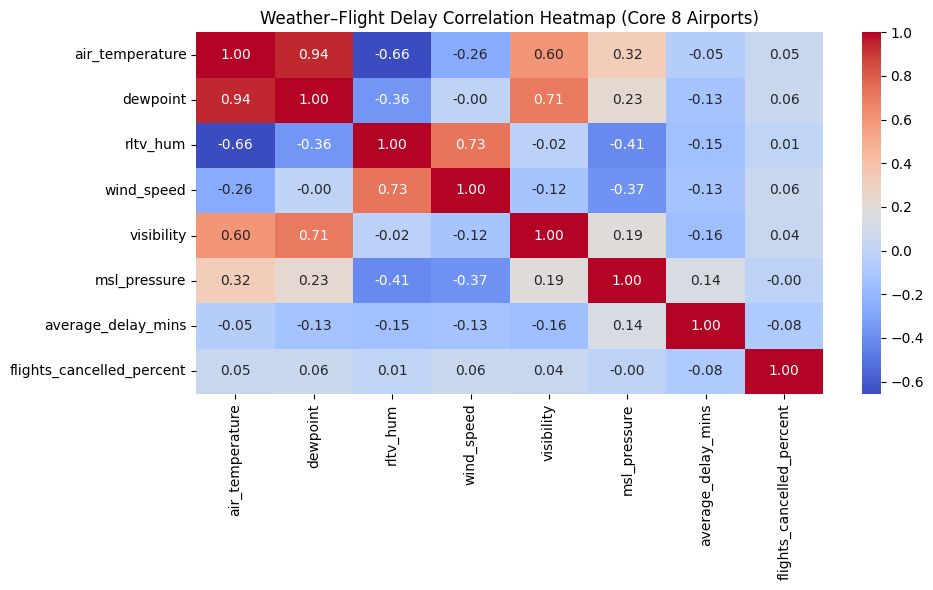

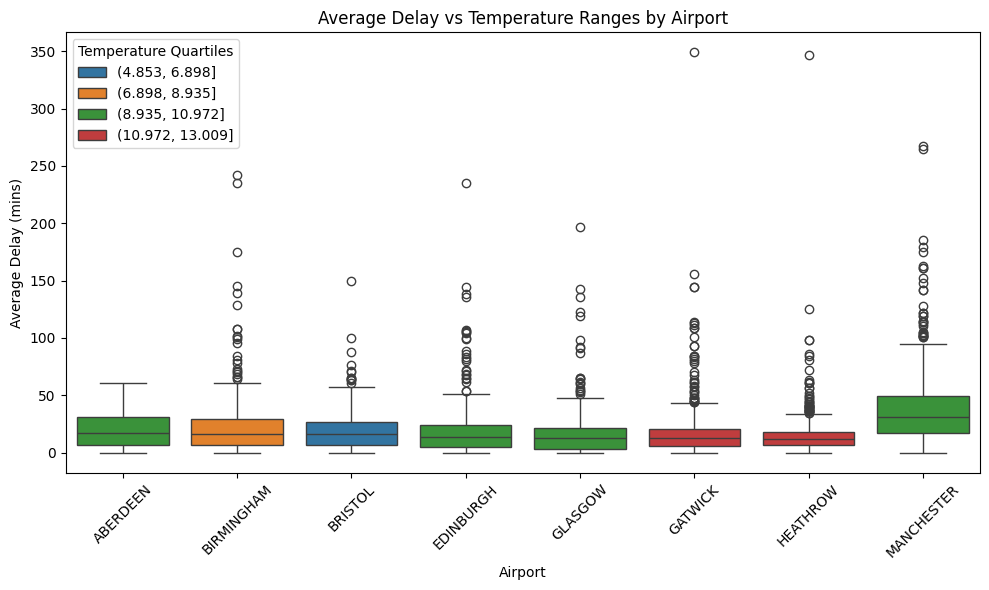

In [24]:
# ============================================================
# 4.5 — Statistical Validation & Weather–Delay Correlation
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- Load the filtered dataset (8 airports only) ---
core_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed/flights_weather_core8.csv")
core_df = pd.read_csv(core_path)

print(f" Loaded core dataset: {core_df.shape[0]} rows × {core_df.shape[1]} columns")

# --- Step 1: Basic numerical validation ---
print("\n Descriptive summary of key delay and weather metrics:")
display(core_df[[
    "average_delay_mins", "flights_cancelled_percent", 
    "air_temperature", "dewpoint", "rltv_hum", "wind_speed", "visibility", "msl_pressure"
]].describe())

# --- Step 2: Correlation between weather and delay variables ---
weather_vars = ["air_temperature", "dewpoint", "rltv_hum", "wind_speed", "visibility", "msl_pressure"]
delay_vars = ["average_delay_mins", "flights_cancelled_percent"]

corr_df = core_df[weather_vars + delay_vars].corr().round(3)

print("\n🔗 Correlation Matrix (Weather vs Delay Variables):")
display(corr_df.loc[delay_vars, weather_vars])

# --- Step 3: Visualize correlation heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Weather–Flight Delay Correlation Heatmap (Core 8 Airports)")
plt.tight_layout()
plt.show()

# --- Step 4: Check airport-level mean delays under varying temperature ranges ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=core_df, x="reporting_airport", y="average_delay_mins", hue=pd.cut(core_df["air_temperature"], bins=4))
plt.xticks(rotation=45)
plt.title("Average Delay vs Temperature Ranges by Airport")
plt.xlabel("Airport")
plt.ylabel("Average Delay (mins)")
plt.legend(title="Temperature Quartiles")
plt.tight_layout()
plt.show()


In [30]:
# ============================================================
# 4.6 — Feature Engineering & Trend Modeling Preparation
# ============================================================

import pandas as pd
import numpy as np
from pathlib import Path

# --- Load core dataset ---
core_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed/flights_weather_core8.csv")
df = pd.read_csv(core_path)

print(f" Loaded: {df.shape[0]} rows × {df.shape[1]} columns")

# --- Step 1: Encode categorical features ---
df["arrival_departure"] = df["arrival_departure"].map({"A": 0, "D": 1})
df["scheduled_charter"] = df["scheduled_charter"].map({"S": 0, "C": 1})

# One-hot encode airport and airline
df = pd.get_dummies(df, columns=["reporting_airport", "airline_name"], drop_first=True)

# --- Step 2: Create derived features ---
df["temp_deviation"] = df["air_temperature"] - df["air_temperature"].mean()
df["humidity_deviation"] = df["rltv_hum"] - df["rltv_hum"].mean()
df["wind_pressure_ratio"] = df["wind_speed"] / df["msl_pressure"]

# --- Step 3: Handle outliers in delay ---
q99 = df["average_delay_mins"].quantile(0.99)
df["average_delay_mins"] = np.where(df["average_delay_mins"] > q99, q99, df["average_delay_mins"])

# --- Step 4: Save modeling-ready data ---
output_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed/flights_weather_features.csv")
df.to_csv(output_path, index=False)

print(f" Saved engineered dataset for modeling: {output_path}")
print(f" Final feature count: {df.shape[1]}")
# Display first few rows
display(df.head())

 Loaded: 3347 rows × 34 columns
 Saved engineered dataset for modeling: C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\flights_weather_features.csv
 Final feature count: 187


,run_date,reporting_period,origin_destination_country,origin_destination,arrival_departure,scheduled_charter,number_flights_matched,actual_flights_unmatched,number_flights_cancelled,flights_more_than_15_minutes_early_percent,...,airline_name_VOLOTEA,airline_name_VUELING AIRLINES,airline_name_WEST JET AIRLINES,airline_name_WIDEROE FLYVESELSKAP A/S,airline_name_WIZZ AIR,airline_name_WIZZ AIR MALTA,airline_name_WIZZ AIR UK LTD,temp_deviation,humidity_deviation,wind_pressure_ratio
0,14/03/2025 09:52,2025-01-01,POLAND,GDANSK,0,0,13,0,0,30.769231,...,False,False,False,False,True,False,False,-1.444796,1.11209,0.006612
1,14/03/2025 09:52,2025-01-01,POLAND,GDANSK,1,0,13,0,0,0.000000,...,False,False,False,False,True,False,False,-1.444796,1.11209,0.006612
2,14/03/2025 09:52,2025-01-01,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),0,0,16,0,1,11.764706,...,False,False,False,False,False,False,False,-1.444796,1.11209,0.006612
3,14/03/2025 09:52,2025-01-01,UNITED KINGDOM,BELFAST CITY (GEORGE BEST),1,0,16,0,1,0.000000,...,False,False,False,False,False,False,False,-1.444796,1.11209,0.006612
4,14/03/2025 09:52,2025-01-01,UNITED KINGDOM,BIRMINGHAM,0,0,50,0,3,18.867925,...,False,False,False,False,False,False,False,-1.444796,1.11209,0.006612


In [43]:
# ============================================================
# STEP 8A — Data Preprocessing & NaN Handling
# ============================================================

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from pathlib import Path

# Load the engineered dataset
data_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed/flights_weather_features.csv")
df = pd.read_csv(data_path)
print(f" Loaded dataset: {df.shape[0]} rows × {df.shape[1]} columns")

# Inspect missingness
missing_summary = df.isna().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
print("\n Columns with missing values:")
display(missing_summary.head(20))

# Choose target
target_col = "average_delay_mins"
feature_cols = [col for col in df.columns if col != target_col]

# Drop rows where target is missing
df = df.dropna(subset=[target_col])

# Separate features and target
X = df[feature_cols]
y = df[target_col]

# Apply imputation for numeric features (replace NaNs with column mean)
num_cols = X.select_dtypes(include="number").columns
imputer = SimpleImputer(strategy="mean")
X[num_cols] = imputer.fit_transform(X[num_cols])

# Optional: handle categorical columns (if any exist)
cat_cols = X.select_dtypes(exclude="number").columns
if len(cat_cols) > 0:
    X[cat_cols] = X[cat_cols].fillna("Unknown")

# Final NaN check
print("\n After imputation, remaining NaNs:", X.isna().sum().sum())

# Save cleaned dataset for model training
clean_path = data_path.parent / "flights_weather_features_clean.csv"
pd.concat([X, y], axis=1).to_csv(clean_path, index=False)
print(f" Saved cleaned dataset to: {clean_path}")


 Loaded dataset: 3347 rows × 187 columns

 Columns with missing values:


previous_year_month_average_delay    550
visibility                           380
dtype: int64


 After imputation, remaining NaNs: 0


C:\Users\NEOWIN AUTOS\AppData\Local\Temp\ipykernel_37448\2736580126.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = imputer.fit_transform(X[num_cols])
C:\Users\NEOWIN AUTOS\AppData\Local\Temp\ipykernel_37448\2736580126.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_cols] = X[cat_cols].fillna("Unknown")


 Saved cleaned dataset to: C:\Users\NEOWIN AUTOS\Documents\Github\weather_delay_project\data\processed\flights_weather_features_clean.csv


In [1]:
# ============================================================
# STEP 8A — Data Preprocessing & NaN Handling (Clean Output)
# ============================================================

import pandas as pd
import warnings
from sklearn.impute import SimpleImputer
from pathlib import Path

# Suppress warnings for clean notebook output
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# === Load the engineered dataset ===
data_path = Path(r"C:/Users/NEOWIN AUTOS/Documents/Github/weather_delay_project/data/processed/flights_weather_features.csv")
df = pd.read_csv(data_path)

print(f" Loaded dataset: {df.shape[0]} rows × {df.shape[1]} columns")

# === Inspect missingness ===
missing_summary = df.isna().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)

print("\n Columns with missing values:\n")
display(missing_summary.to_frame(name="# Missing").style.background_gradient("BuPu"))

# === Choose target and features ===
target_col = "average_delay_mins"
feature_cols = [c for c in df.columns if c != target_col]

# Drop rows with missing target values
df = df.dropna(subset=[target_col])

# === Split features and target ===
X, y = df[feature_cols].copy(), df[target_col].copy()

# === Impute numeric columns (replace NaNs with mean) ===
num_cols = X.select_dtypes(include="number").columns
imputer = SimpleImputer(strategy="mean")
X.loc[:, num_cols] = imputer.fit_transform(X[num_cols])

# === Handle categorical columns ===
cat_cols = X.select_dtypes(exclude="number").columns
if len(cat_cols) > 0:
    X.loc[:, cat_cols] = X[cat_cols].fillna("Unknown")

# === Final NaN check ===
remaining_nans = X.isna().sum().sum()
print(f"\n After imputation, remaining NaNs: {remaining_nans}")

# === Save cleaned dataset ===
clean_path = data_path.parent / "flights_weather_features_clean.csv"
pd.concat([X, y], axis=1).to_csv(clean_path, index=False)
print(f" Saved cleaned dataset to: {clean_path}")


 Loaded dataset: 3347 rows × 187 columns

 Columns with missing values:



AttributeError: The '.style' accessor requires jinja2

In [44]:
# Clean src_id columns
flights_df["src_id"] = flights_df["src_id"].astype(str).str.strip()
weather_df["src_id"] = weather_df["src_id"].astype(str).str.strip()

# Extract months
flights_df["month"] = flights_df["reporting_period"].dt.month
weather_df["month"] = weather_df["reporting_period"].dt.month

# Compare IDs
weather_ids = set(weather_df["src_id"].unique())
flight_ids = set(flights_df["src_id"].unique())
missing_in_weather = flight_ids - weather_ids
# rows and columns for all stations in flights and weather data
print(f"Flights dataset: {flights_df.shape[0]} rows × {flights_df.shape[1]} columns")
print(f"Weather dataset: {weather_df.shape[0]} rows × {weather_df.shape[1]} columns")

print(f"❗ Stations in flights but missing in weather data: {len(missing_in_weather)}")
print(missing_in_weather)
# Drop ❗ Stations in flights but missing in weather data: nan, NAN, None
flights_df = flights_df[~flights_df["src_id"].isin(missing_in_weather)]


print(f" Updated flights dataset after dropping missing stations: {flights_df.shape[0]} rows × {flights_df.shape[1]} columns")
# check remaining unique src_id values
remaining_ids = flights_df["src_id"].unique()
print(f" Remaining unique src_id values in flights data: {len(remaining_ids)}")

Flights dataset: 3347 rows × 28 columns
Weather dataset: 94 rows × 11 columns
❗ Stations in flights but missing in weather data: 0
set()
 Updated flights dataset after dropping missing stations: 3347 rows × 28 columns
 Remaining unique src_id values in flights data: 8


In [42]:
# Check which flights are missing a src_id or have one not in your weather data
missing_src = flights_df[flights_df["src_id"].isna() | (flights_df["src_id"] == "")]
unique_missing_airports = missing_src["reporting_airport"].unique()

print(f"⚠️ Airports missing station mapping: {len(unique_missing_airports)} found")
display(pd.DataFrame(unique_missing_airports, columns=["Airport"]))


⚠️ Airports missing station mapping: 0 found


,Airport
